In [14]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import random
import math
import os

import warnings
warnings.filterwarnings('ignore')


Decripcion de los datos
                x           y
count   133.00000  133.000000
mean   1946.00000    8.528271
std      38.53786    0.629293
min    1880.00000    6.920000
25%    1913.00000    8.100000
50%    1946.00000    8.430000
75%    1979.00000    8.890000
max    2012.00000   10.410000


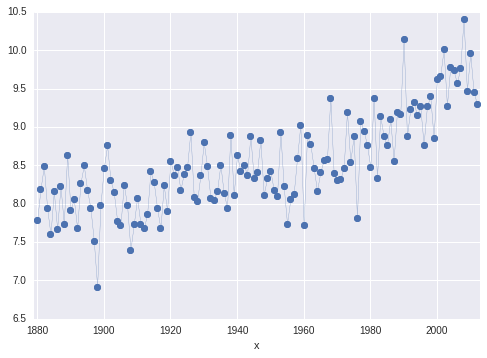

In [15]:
# Levanto los datos
df = pd.read_csv('./data/worldTemperature.csv', ' ')
print("Decripcion de los datos")
print(df.describe())

# print("\nLas primeras 8 filas de los datdos")
# print(df.head(8))

# Graficos los datos
ax = sns.tsplot(time=df['x'], data=df['y'], interpolate=False)
sns.plt.show()

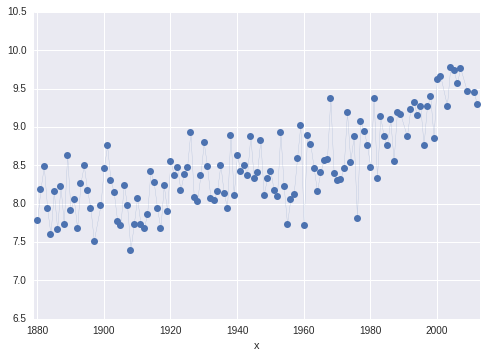

In [16]:
# Limpio los outliers
def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
    
mascara = mascara_outliers(df['y'])
df = df[mascara]
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

# Para que se evidencien mejor los outliers que saque, grafico en el mismo rango
# Algunos me parecen que no deberian ser removidos
sns.plt.ylim((6.5, 10.5))
sns.plt.show()

In [17]:
# Uso cuadrados minimos para predecir
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([20*np.cos(5*t),1000*np.cos(60*t),10*np.sin(50*t),t, 1])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    df_e = df[df['x'].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e['x'])
    regr.fit(A_e, df_e['y'])

    # Me fijo la aproximacion que se realizo
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e['x'], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[df['x'].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p['x'])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p['x'], data=df_p['p'], color='g')

    ECM = sum((df_p['p']-df_p['y'])**2)
    return ECM

def predecir(k):
    return entrenar_y_predecir_en_rangos(df, range(k-35,k), range(k,k+10))

Error de prediccion: 0.76
Error de prediccion: 2.01
Error de prediccion: 0.53
Error promedio: 1.09917354141


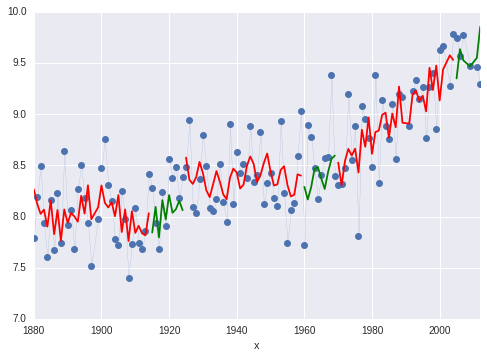

In [18]:

ECM1= predecir(1915)
print("Error de prediccion: {:.2f}".format(ECM1))    

ECM2= predecir(1960)
print("Error de prediccion: {:.2f}".format(ECM2))    

ECM3= predecir(2005)
print("Error de prediccion: {:.2f}".format(ECM3))

print ("Error promedio:",(ECM1+ECM2+ECM3)/3)

sns.plt.xlim((1880, 2012))
sns.plt.show()

In [19]:
# Un par de cosas mas de pandas
# years = [2004]*6 + [2005]*6 + [2006]*6
# delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
# delays[2] = 5
# delays[7] = 80

# df1 = pd.DataFrame({
#     'year': years,
#     'delay': delays
# })

# print df1

# # Groupby y sacar outliers
# mascara = df1.groupby('year')['delay'].apply(mascara_outliers)
# df1 = df1[mascara]
# print df1

# # Groupby y calcular promedio
# promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
# print promedio

In [72]:
#Experimento 2 dirty version(?)
#Idea basica: 
#Elegir representantes caracteristicos de cada clima (porque dicho clima representa la mayor parte del pais)
#Ademas el pais intenta ser lo mas grande posible dentro del clima elegido. 

#Idea mejorada:
#Elegir varios representantes de cada clima y promediarlos obteniendo la tempertaura promedio anual de un clima dado.


# Levanto los datos de cada pais, las mediciones son por mes
#Los años donde no hay mediciones no aparecen. Hay que hacer algo con esto despues...
#Canada:
df_mean = pd.read_csv('./data/paises/Canada.csv',' ',header = None, names = ['year', 'temp'])
df_mean['year'] = df_mean['year'].map(lambda x: math.modf(x)[1])
# Groupby y calcular promedio anual tomando los meses
df_mean['year']
df_mean= df_mean.groupby('year').aggregate(['mean']).reset_index()


#Repito para el resto
for filename in os.listdir('./data/paises/'):
    aux = pd.read_csv('./data/paises/'+filename,' ',header = None, names = ['year', 'temp'])
    aux['year'] = aux['year'].map(lambda x: math.modf(x)[1])
    aux_mean= aux.groupby('year').aggregate(['mean']).reset_index()
    df_mean[filename] = aux_mean.temp
    
#Por alguna razon los años sin mediciones son los mismos para todos?! Al menos eso devuelve el script...
#df_mean = df_mean[df_mean['year'].isin(range(1891,2013))]

df_aux = df[df['x'].isin(range(1882,2013))].reset_index()

df_mean['worldAvg'] = df_aux.y

#Agregar columna de y's (temperaturas mundiales por año)

#TODO

#Ahora aplicar CM. 
#sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

def armar_matriz_A_multivar(s):
    temp = []
    for t in s:
        temp.append([np.mean(t)])
    return np.array(temp)

df_mean




#Funciones posibles(cada una de ellas es un experimento distinto, no necesariamente reportable (nos quedamos con el mejor): 
#Promedio asi nomas
#Promedio pesado
#Promedio pesado + cte
#mas...
#TODO











,year,temp,Zambia.csv,Paraguay.csv,Germany.csv,Mongolia.csv,Egypt.csv,Canada.csv,Ecuador.csv,Italy.csv,worldAvg
,,mean,,,,,,,,,
0,1882,-5.717417,20.657000,22.518167,8.316583,-0.912667,21.902833,-5.717417,21.191250,12.803417,8.49
1,1883,-6.405250,20.652083,22.605500,7.837500,-1.358750,22.088333,-6.405250,20.941333,11.998250,7.94
2,1886,-6.162000,20.839500,22.519833,7.990583,-0.970833,21.935500,-6.162000,21.197417,12.575250,7.60
3,1891,-5.629667,20.648333,22.900250,7.493250,-0.991750,22.537417,-5.629667,21.380000,11.955000,8.16
4,1892,-5.338083,20.879333,22.587750,7.587667,-1.957250,22.596167,-5.338083,21.114000,12.576917,7.67
5,1893,-6.273083,20.700083,22.326083,7.947000,-0.737667,22.047250,-6.273083,20.866917,12.542333,8.23
6,1894,-5.801250,20.953250,22.736667,8.180250,-0.474667,22.277917,-5.801250,21.222167,12.520083,7.74
7,1895,-5.452583,21.044583,23.309667,7.422500,-1.493917,22.327583,-5.452583,21.527250,12.359417,8.64
8,1896,-6.017417,21.203000,23.692083,7.687750,-0.894333,22.525083,-6.017417,21.640250,11.949833,7.92


In [ ]:
#Otros experimentos